<a href="https://colab.research.google.com/github/SurekhaBerlin/Python/blob/main/SocialBuzz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SOCIAL BUZZ

## STEP 0 : Importing Libraries and Reading Data

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

In [36]:
content = pd.read_csv('/content/Content.csv',index_col=0)
reactiontypes = pd.read_csv('/content/ReactionTypes.csv',index_col=0)
reactions = pd.read_csv('/content/Reactions.csv',index_col=0)

In [37]:
content.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Content ID  1000 non-null   object
 1   User ID     1000 non-null   object
 2   Type        1000 non-null   object
 3   Category    1000 non-null   object
 4   URL         801 non-null    object
dtypes: object(5)
memory usage: 46.9+ KB


In [38]:
content.isnull().sum()

Content ID      0
User ID         0
Type            0
Category        0
URL           199
dtype: int64

## STEP 1: Data Understanding

In [39]:
content.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Content ID  1000 non-null   object
 1   User ID     1000 non-null   object
 2   Type        1000 non-null   object
 3   Category    1000 non-null   object
 4   URL         801 non-null    object
dtypes: object(5)
memory usage: 46.9+ KB


In [40]:
content.head()

,Content ID,User ID,Type,Category,URL
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,https://socialbuzz.cdn.com/content/storage/975...
1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,beb1f34e-7870-46d6-9fc7-2e12eb83ce43,photo,healthy eating,https://socialbuzz.cdn.com/content/storage/9f7...
2,230c4e4d-70c3-461d-b42c-ec09396efb3f,a5c65404-5894-4b87-82f2-d787cbee86b4,photo,healthy eating,https://socialbuzz.cdn.com/content/storage/230...
3,356fff80-da4d-4785-9f43-bc1261031dc6,9fb4ce88-fac1-406c-8544-1a899cee7aaf,photo,technology,https://socialbuzz.cdn.com/content/storage/356...
4,01ab84dd-6364-4236-abbb-3f237db77180,e206e31b-5f85-4964-b6ea-d7ee5324def1,video,food,https://socialbuzz.cdn.com/content/storage/01a...


## STEP 2:
* Dropping irrelevant rows and columns
* Identifying duplicated columns
* Renaming columns
* Feature Creation

In [41]:
#Removing the URL column
content.drop(columns=['URL'], inplace=True)

In [42]:
content.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Content ID  1000 non-null   object
 1   User ID     1000 non-null   object
 2   Type        1000 non-null   object
 3   Category    1000 non-null   object
dtypes: object(4)
memory usage: 39.1+ KB


In [43]:
content['Category'].value_counts()

Category
technology           71
animals              67
travel               67
culture              63
science              63
fitness              61
food                 61
healthy eating       61
cooking              60
soccer               58
tennis               58
education            57
dogs                 56
studying             55
veganism             48
public speaking      48
Fitness               5
Animals               4
Science               4
"soccer"              3
"culture"             3
Soccer                3
"dogs"                2
Education             2
Studying              2
Travel                2
Food                  2
"veganism"            1
"public speaking"     1
Public Speaking       1
"technology"          1
"cooking"             1
Healthy Eating        1
"studying"            1
"food"                1
Culture               1
"tennis"              1
Technology            1
"animals"             1
Veganism              1
"science"             1
Name: c

In [44]:
# Removing the unnecessary apostraphe and lower
content['Category'] = content['Category'].apply(lambda x:x.strip('"').lower())

In [45]:
content['Category'].value_counts()

Category
technology         73
animals            72
travel             69
science            68
culture            67
fitness            66
food               64
soccer             64
healthy eating     62
cooking            61
tennis             59
education          59
studying           58
dogs               58
public speaking    50
veganism           50
Name: count, dtype: int64

In [46]:
# Rename content to content_type
content.rename(columns={'Type':'Content_Type'},inplace=True)

In [47]:
content['Content_Type'].value_counts()

Content_Type
photo    261
video    259
GIF      244
audio    236
Name: count, dtype: int64

In [48]:
reactions.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25553 entries, 0 to 25552
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Content ID  25553 non-null  object
 1   User ID     22534 non-null  object
 2   Type        24573 non-null  object
 3   Datetime    25553 non-null  object
dtypes: object(4)
memory usage: 998.2+ KB


In [49]:
reactions.head()

,Content ID,User ID,Type,Datetime
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,NaN,NaN,2021-04-22 15:17:15
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,5d454588-283d-459d-915d-c48a2cb4c27f,disgust,2020-11-07 09:43:50
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,92b87fa5-f271-43e0-af66-84fac21052e6,dislike,2021-06-17 12:22:51
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,163daa38-8b77-48c9-9af6-37a6c1447ac2,scared,2021-04-18 05:13:58
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,34e8add9-0206-47fd-a501-037b994650a2,disgust,2021-01-06 19:13:01


In [50]:
# convert dates to datetime
reactions['Datetime'] = pd.to_datetime(reactions['Datetime'], errors='coerce')

In [51]:
reactions.describe()

,Datetime
count,25553
mean,2020-12-17 08:24:41.926192384
min,2020-06-18 07:59:17
25%,2020-09-16 19:28:40
50%,2020-12-17 09:42:26
75%,2021-03-17 13:05:16
max,2021-06-18 08:30:29


In [52]:
# drop user ID column
reactions.drop(labels = ['User ID'],axis=1,inplace=True)

In [53]:
#drop rows with missing values
reactions.dropna(inplace=True)

In [54]:
#rename column
reactions.rename(columns={"Type":'Reaction_Type'},inplace=True)

In [55]:
reactions.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24573 entries, 1 to 25552
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Content ID     24573 non-null  object        
 1   Reaction_Type  24573 non-null  object        
 2   Datetime       24573 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(2)
memory usage: 767.9+ KB


In [56]:
reactiontypes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16 entries, 0 to 15
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Type       16 non-null     object
 1   Sentiment  16 non-null     object
 2   Score      16 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 512.0+ bytes


In [57]:
#rename type column
reactiontypes.rename(columns={'Type':'Reaction_Type'},inplace=True)
reactiontypes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16 entries, 0 to 15
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Reaction_Type  16 non-null     object
 1   Sentiment      16 non-null     object
 2   Score          16 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 512.0+ bytes


In [58]:
reactiontypes.value_counts()

Reaction_Type  Sentiment  Score
adore          positive   72       1
cherish        positive   70       1
disgust        negative   0        1
dislike        negative   10       1
hate           negative   5        1
heart          positive   60       1
indifferent    neutral    20       1
interested     positive   30       1
intrigued      positive   45       1
like           positive   50       1
love           positive   65       1
peeking        neutral    35       1
scared         negative   15       1
super love     positive   75       1
want           positive   70       1
worried        negative   12       1
Name: count, dtype: int64

In [59]:
reactiontypes.describe()

,Score
count,16.000000
mean,39.625000
std,26.901983
min,0.000000
25%,14.250000
50%,40.000000
75%,66.250000
max,75.000000


Now the data is clean and we have an understanding about the data

## Step 3: Data Modelling
Creating a joined table of all the 3 files for analysis

In [60]:
#merge tables on content ID columns
merged_df = reactions.merge(content,on='Content ID')

In [61]:
#merge tables on reaction type column
merged_df= merged_df.merge(reactiontypes,on='Reaction_Type')

## Step 4: Data Analysis

In [62]:
merged_df.head()

,Content ID,Reaction_Type,Datetime,User ID,Content_Type,Category,Sentiment,Score
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,studying,negative,0
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,studying,negative,0
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-04-09 02:46:20,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,studying,negative,0
3,9f737e0a-3cdd-4d29-9d24-753f4e3be810,disgust,2021-03-28 21:15:26,beb1f34e-7870-46d6-9fc7-2e12eb83ce43,photo,healthy eating,negative,0
4,230c4e4d-70c3-461d-b42c-ec09396efb3f,disgust,2020-08-04 05:40:33,a5c65404-5894-4b87-82f2-d787cbee86b4,photo,healthy eating,negative,0


In [63]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24573 entries, 0 to 24572
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Content ID     24573 non-null  object        
 1   Reaction_Type  24573 non-null  object        
 2   Datetime       24573 non-null  datetime64[ns]
 3   User ID        24573 non-null  object        
 4   Content_Type   24573 non-null  object        
 5   Category       24573 non-null  object        
 6   Sentiment      24573 non-null  object        
 7   Score          24573 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 1.5+ MB


In [64]:
merged_df.shape

(24573, 8)

We have over 24,573 rows of data. Let's use this table to answer our business question regarding the top five categories with the largest aggregate popularity.

## Top Category Analysis
* The measure of popularity provided to us by the client is the "Score" column.
* To find the highest aggregate popularity for each category, we simply have to sum this value by category.

In [65]:
# Group by 'Category' and sum 'Score'
top_five = merged_df.groupby('Category')['Score'].sum().sort_values(ascending=False)
print(top_five.head(5))

Category
animals           74965
science           71168
healthy eating    69339
technology        68738
food              66676
Name: Score, dtype: int64


In [66]:
merged_df.to_csv('final_data.csv')

## EDA

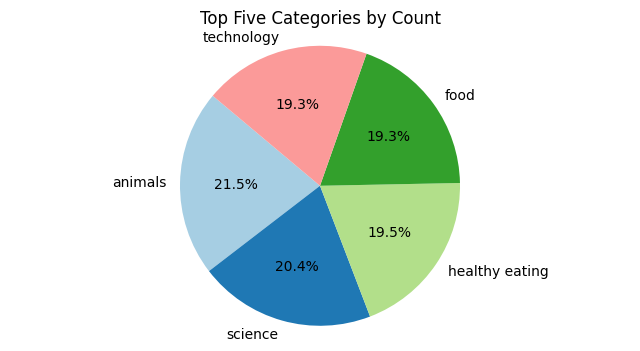

In [67]:
# Count occurrences of each category
category_counts = merged_df['Category'].value_counts().head(5)

# Plotting a pie chart
plt.figure(figsize=(8, 4))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Top Five Categories by Count')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [74]:
# Convert 'Datetime' column to datetime type
merged_df['Datetime'] = pd.to_datetime(merged_df['Datetime'])

# Extract year, month, and day into separate columns
merged_df['Year'] = merged_df['Datetime'].dt.year
merged_df['Month'] = merged_df['Datetime'].dt.month
merged_df['Day'] = merged_df['Datetime'].dt.day

# Add columns for name of the month and name of the day
merged_df['Month_Name'] = merged_df['Datetime'].dt.strftime('%B')  # Full name of the month
merged_df['Day_Name'] = merged_df['Datetime'].dt.strftime('%A')    # Full name of the day of the week


In [75]:
merged_df.head()

,Content ID,Reaction_Type,Datetime,User ID,Content_Type,Category,Sentiment,Score,Year,Month,Day,Month_Name,Day_Name
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,studying,negative,0,2020,11,7,November,Saturday
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,studying,negative,0,2021,1,6,January,Wednesday
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-04-09 02:46:20,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,studying,negative,0,2021,4,9,April,Friday
3,9f737e0a-3cdd-4d29-9d24-753f4e3be810,disgust,2021-03-28 21:15:26,beb1f34e-7870-46d6-9fc7-2e12eb83ce43,photo,healthy eating,negative,0,2021,3,28,March,Sunday
4,230c4e4d-70c3-461d-b42c-ec09396efb3f,disgust,2020-08-04 05:40:33,a5c65404-5894-4b87-82f2-d787cbee86b4,photo,healthy eating,negative,0,2020,8,4,August,Tuesday


<Figure size 2000x4000 with 0 Axes>

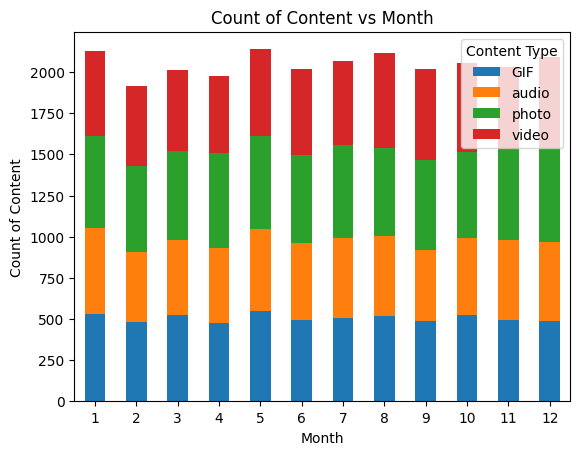

In [81]:
# Extract month and content type
merged_df['Month'] = merged_df['Datetime'].dt.month
merged_df['Month_Name'] = merged_df['Datetime'].dt.strftime('%B')  # Full name of the month

# Group by month and content type, then count
monthly_counts = merged_df.groupby(['Month', 'Content_Type']).size().unstack(fill_value=0)

# Plotting a bar chart
plt.figure(figsize=(20, 40))
monthly_counts.plot(kind='bar', stacked=True)
plt.xlabel('Month')
plt.ylabel('Count of Content')
plt.title('Count of Content vs Month')
plt.xticks(rotation=1)
plt.legend(title='Content Type', loc='upper right')
plt.show()

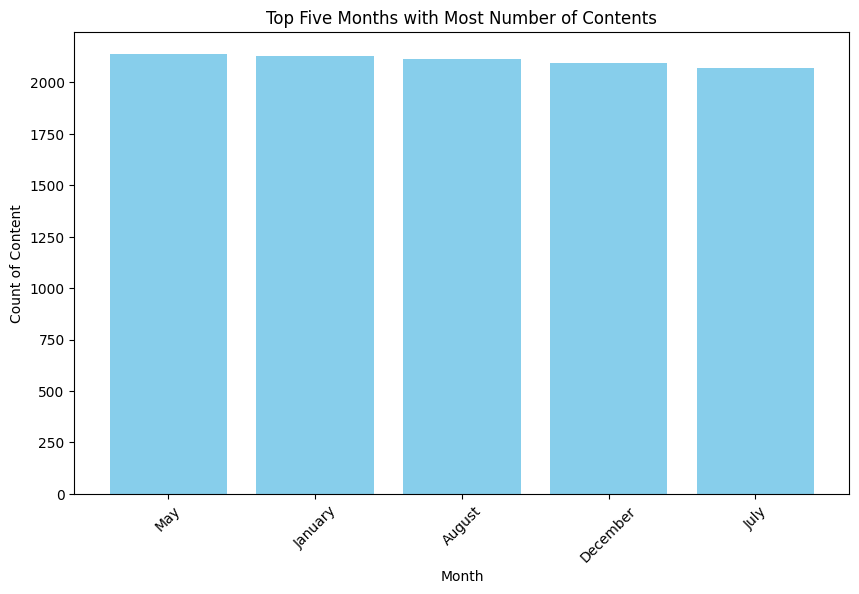

In [82]:
# Extract month and year
merged_df['Month'] = merged_df['Datetime'].dt.month
merged_df['Month_Name'] = merged_df['Datetime'].dt.strftime('%B')  # Full name of the month

# Group by month and count content types
monthly_counts = merged_df.groupby(['Month', 'Month_Name']).size().reset_index(name='Count')

# Sort by count descending and take top five months
top_five_months = monthly_counts.sort_values(by='Count', ascending=False).head(5)

# Plotting a bar chart for top five months
plt.figure(figsize=(10, 6))
plt.bar(top_five_months['Month_Name'], top_five_months['Count'], color='skyblue')
plt.xlabel('Month')
plt.ylabel('Count of Content')
plt.title('Top Five Months with Most Number of Contents')
plt.xticks(rotation=45)
plt.show()

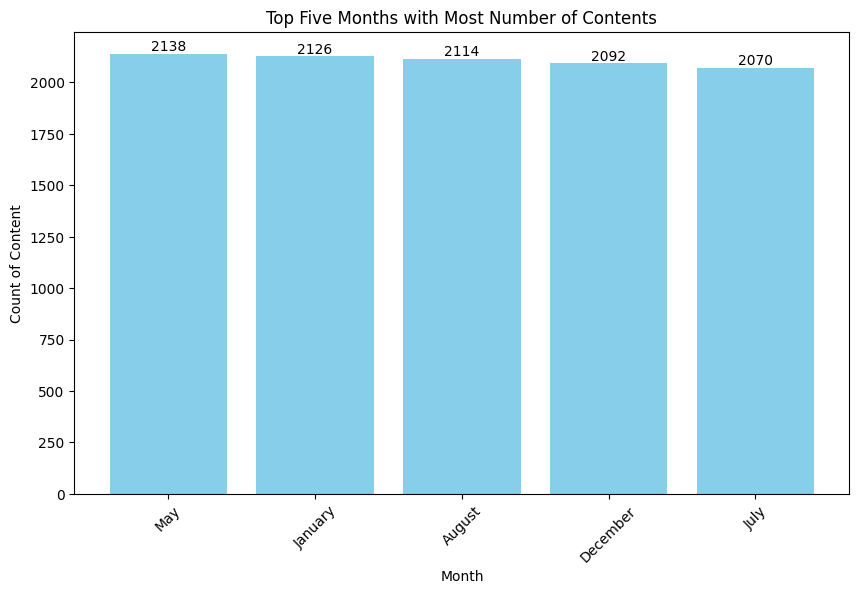

In [91]:
# Convert 'Datetime' column to datetime type
merged_df['Datetime'] = pd.to_datetime(merged_df['Datetime'])

# Extract month and year
merged_df['Month'] = merged_df['Datetime'].dt.month
merged_df['Month_Name'] = merged_df['Datetime'].dt.strftime('%B')  # Full name of the month

# Group by month and count content types
monthly_counts = merged_df.groupby(['Month', 'Month_Name']).size().reset_index(name='Count')

# Sort by count descending and take top five months
top_five_months = monthly_counts.sort_values(by='Count', ascending=False).head(5)

# Plotting a bar chart for top five months with data labels
plt.figure(figsize=(10,6))
bars = plt.bar(top_five_months['Month_Name'], top_five_months['Count'], color='skyblue')

# Add data labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, int(yval), ha='center', va='bottom', fontsize=10)

plt.xlabel('Month')
plt.ylabel('Count of Content')
plt.title('Top Five Months with Most Number of Contents')
plt.xticks(rotation=45)

plt.show()